# Advent of Code - 2024 - Day 13 - Problem 1

https://adventofcode.com/2024/day/13

## Load Source Data

Load the map data into `DATA`.

In [1]:
f = open("data/day13.txt", "r")
DATA = list(map(str.strip, f.readlines()))
f.close()

## Create Game Class

In [2]:
class Game:

    def __init__(self, button_a_x, button_a_y, button_b_x, button_b_y, prize_x, prize_y):
        self._button_a_x = int(button_a_x)
        self._button_a_y = int(button_a_y)
        self._button_b_x = int(button_b_x)
        self._button_b_y = int(button_b_y)
        self._prize_x = int(prize_x)
        self._prize_y = int(prize_y)

    def __str__(self):
        return (
            f"_button_a_x = {self._button_a_x}, "
            + f"_button_a_y = {self._button_a_y}, "
            + f"_button_b_x = {self._button_b_x}, "
            + f"_button_b_y = {self._button_b_y}, "
            + f"_prize_x = {self._prize_x}, "
            + f"_prize_y = {self._prize_y}"
        )

    def play(self):

        b_presses = min(self._prize_x // self._button_b_x, self._prize_y // self._button_b_y)

        dx = self._prize_x - (b_presses * self._button_b_x)
        dy = self._prize_y - (b_presses * self._button_b_y)

        if dx == 0 and dy == 0:
            return (0, b_presses)

        while True:

            # See if we can win the game by pressing the A button
            #
            a_presses = min(dx // self._button_a_x, dy // self._button_a_y)
            if dx == (a_presses * self._button_a_x) and dy == (a_presses * self._button_a_y):
                return (a_presses, b_presses)

            # "Unpress" the B button once
            #
            dx += self._button_b_x
            dy += self._button_b_y
            b_presses -= 1
            if b_presses < 0:
                return (-1, -1)

## Parse Data

Sample input:

```
Button A: X+97, Y+12
Button B: X+52, Y+63
Prize: X=10471, Y=4350
```

In [3]:
import re

GAMES = []

BUTTON_REGEX = re.compile("Button [AB]: X\+(\d+), Y\+(\d+)")
PRIZE_REGEX = re.compile("Prize: X=(\d+), Y=(\d+)")

idx = 0
while idx < len(DATA):
    button_a = BUTTON_REGEX.match(DATA[idx + 0])
    button_b = BUTTON_REGEX.match(DATA[idx + 1])
    prize = PRIZE_REGEX.match(DATA[idx + 2])

    button_a_x = button_a.group(1)
    button_a_y = button_a.group(2)
    button_b_x = button_b.group(1)
    button_b_y = button_b.group(2)
    prize_x = prize.group(1)
    prize_y = prize.group(2)

    g = Game(button_a_x, button_a_y, button_b_x, button_b_y, prize_x, prize_y)
    GAMES.append(g)
    idx += 4

len(GAMES)

320

## Play Games

In [4]:
token_count = 0

for game in GAMES:
    solution = game.play()

    a, b = solution
    if a != -1 and b != -1:
        token_count += (a * 3) + b

print(f"token_count = {token_count}")

token_count = 31589


## Render Solutions

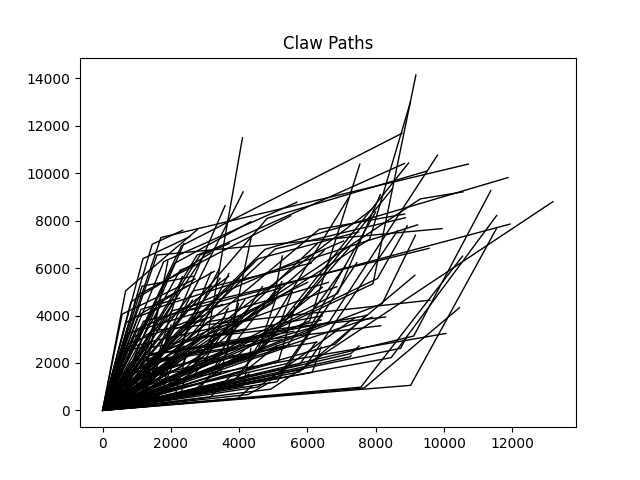

In [5]:
%matplotlib widget

import matplotlib.pyplot as plt

from matplotlib.patches import PathPatch
from matplotlib.path import Path


fig, axis = plt.subplots()

for game in GAMES:
    solution = game.play()

    a_presses, b_presses = solution
    if a_presses != -1 and b_presses != -1:
        ax = a_presses * game._button_a_x
        ay = a_presses * game._button_a_y
        bx = b_presses * game._button_b_x
        by = b_presses * game._button_b_y

        vertices = [(0,0), (ax, ay), (ax+bx, ay+by)]
        codes = [Path.MOVETO] + [Path.LINETO] * 2

        path = Path(vertices, codes)
        pathpatch = PathPatch(path, facecolor="none", edgecolor="black")
        axis.add_patch(pathpatch)

axis.set_title("Claw Paths")

axis.autoscale_view()

plt.show()